In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [703]:
data_set=pd.read_csv("/content/creditcard.csv")

In [704]:
data_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0


In [705]:
pd.DataFrame(data_set,columns=['Class'])

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9960,0.0
9961,0.0
9962,0.0
9963,0.0


In [706]:
data_set['Class'].value_counts()

0.0    9926
1.0      38
Name: Class, dtype: int64

In [707]:
x=data_set['Class'].value_counts().sum()

In [708]:
x

9964

In [709]:
percentage = ( data_set['Class'].value_counts()/ x) * 100

In [710]:
percentage

0.0    99.618627
1.0     0.381373
Name: Class, dtype: float64

In [711]:
labels=[0,1]

Text(0.5, 1.0, 'credit card fraud detection')

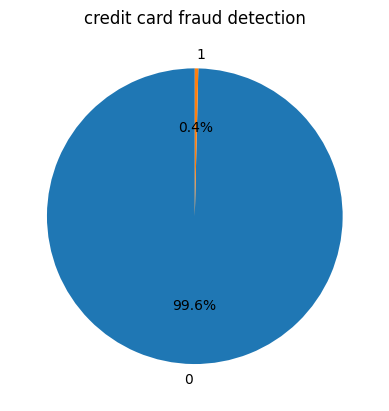

In [712]:
plt.pie(percentage, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('credit card fraud detection')

In [713]:
data_set.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [714]:
data_set=data_set.fillna(value=0)

In [715]:
data_set.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [716]:
legit=data_set[data_set.Class == 0]
fraud=data_set[data_set.Class == 1]

In [717]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [718]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0


In [719]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0


In [720]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [721]:
df=legit.Amount.describe()
df=pd.DataFrame(df)

In [722]:
df1=fraud.Amount.describe()
df1=pd.DataFrame(df1)

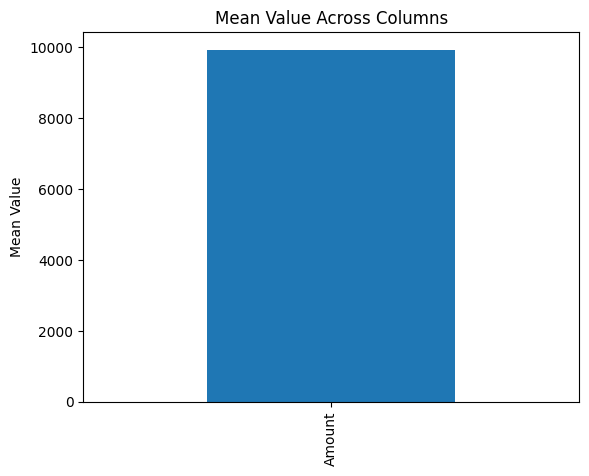

In [723]:
import matplotlib.pyplot as plt
df.loc['count'].plot(kind='bar')
plt.ylabel('Mean Value')
plt.title('Mean Value Across Columns')
plt.show()


In [724]:
mean_values = df.loc['mean']
count_values = df.loc['count']

In [725]:
summary_df = pd.DataFrame({'Mean': mean_values, 'Count': count_values})

<BarContainer object of 1 artists>

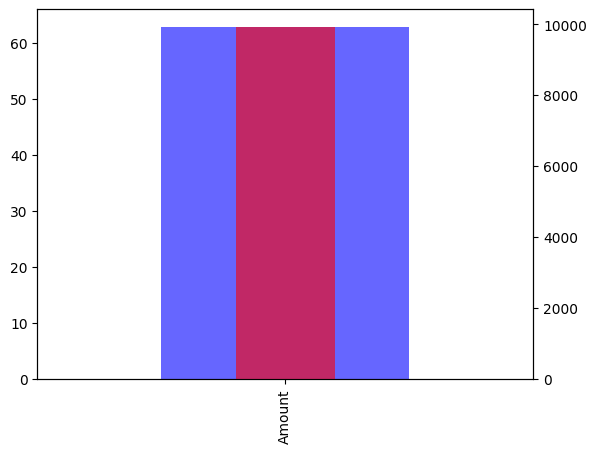

In [726]:
ax = summary_df['Mean'].plot(kind='bar', color='blue', alpha=0.6, label='Mean')
ax2 = ax.twinx()
ax2.bar(ax.get_xticks(), summary_df['Count'], color='red', alpha=0.6, width=0.2, label='Count')

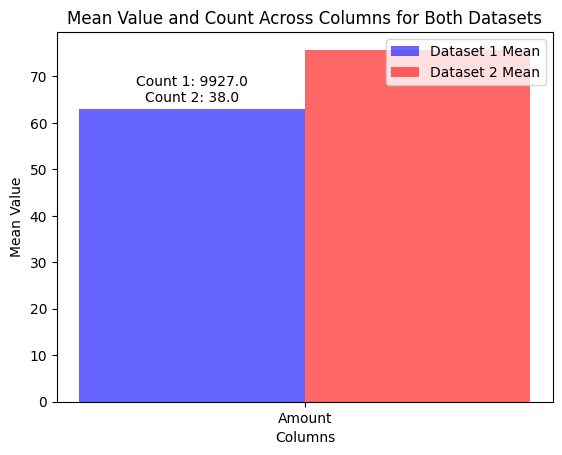

In [727]:
mean_values1 = df.loc['mean']
count_values1 = df.loc['count']

mean_values2 = df1.loc['mean']
count_values2 = df1.loc['count']

# Combine the mean and count values into separate DataFrames
summary_df1 = pd.DataFrame({'Mean': mean_values1, 'Count': count_values1})
summary_df2 = pd.DataFrame({'Mean': mean_values2, 'Count': count_values2})

# Create a bar chart with mean and count values for both datasets
width = 0.35  # Width of each bar

fig, ax = plt.subplots()

x = np.arange(len(mean_values1.index))  # x-axis values

bar1 = ax.bar(x - width/2, summary_df1['Mean'], width, label='Dataset 1 Mean', color='blue', alpha=0.6)
bar2 = ax.bar(x + width/2, summary_df2['Mean'], width, label='Dataset 2 Mean', color='red', alpha=0.6)

# Set labels and legends
ax.set_ylabel('Mean Value')
ax.set_xlabel('Columns')
ax.set_xticks(x)
ax.set_xticklabels(mean_values1.index, rotation=0)
ax.legend(loc='upper right')

for bar, count1, count2 in zip(bar1, count_values1, count_values2):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'Count 1: {count1}\nCount 2: {count2}',
            ha='center', va='bottom')

plt.title('Mean Value and Count Across Columns for Both Datasets')
plt.show()

In [728]:
n_rows_to_sample = fraud.shape[0]

In [729]:
legit = legit.sample(n=n_rows_to_sample ,replace=True)

In [730]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
436,313,-1.038356,0.756122,0.719942,0.988402,-0.237290,-0.378862,0.413668,0.436787,-0.448178,...,0.189550,0.477872,0.298492,0.029368,-0.300420,-0.294100,-0.009905,0.038861,68.00,0.0
2107,1618,-1.567669,0.897999,1.729049,-1.203222,0.879027,1.511849,0.483458,0.439483,0.252151,...,-0.119343,-0.033205,-0.162268,-1.011758,0.012368,0.429578,-0.185702,-0.065808,5.00,0.0
916,692,1.236646,0.306499,0.190288,0.497587,-0.136113,-0.553196,-0.011583,-0.045015,-0.229983,...,-0.255791,-0.765166,0.073434,-0.037838,0.236204,0.097069,-0.026258,0.017657,1.98,0.0
8769,11946,1.193354,-0.288872,0.497846,0.236994,-0.626745,-0.226766,-0.453934,0.021628,2.023600,...,-0.235053,-0.338452,-0.108449,0.003407,0.380651,1.078155,-0.111301,-0.018346,32.20,0.0
7501,10238,-1.151646,0.502294,2.244045,-0.437625,0.492016,-1.056144,0.338214,0.075605,0.696450,...,-0.275136,-0.927080,-0.063892,0.408018,0.148924,-0.102728,-0.079557,0.048643,1.98,0.0
4825,4313,1.158699,0.331468,0.689981,1.672139,-0.255822,-0.337555,-0.046479,-0.099616,1.599443,...,-0.238616,-0.201781,-0.000391,0.338751,0.588836,-0.369252,0.013125,0.010886,1.00,0.0
4025,3664,1.009551,0.107880,0.315132,0.581409,0.479801,1.318387,-0.494371,0.512347,1.179214,...,-0.271421,-0.489534,0.257946,-1.144527,-0.186542,0.169133,0.009816,-0.000763,11.99,0.0
2440,2007,-1.416097,-0.439945,2.951172,-1.043307,0.318020,-0.712666,0.686086,-0.665293,0.886190,...,-0.281660,0.130019,0.292950,0.442992,0.199112,0.810611,-0.587232,-0.743571,1.90,0.0
8814,12031,-0.689934,0.388272,1.923482,-0.610600,0.112817,-0.586144,0.288550,0.003101,1.551985,...,-0.097018,0.106893,-0.086591,0.421943,-0.280119,0.891384,0.009906,0.106906,4.90,0.0
3246,2803,-0.432179,0.925690,1.428832,-0.217665,0.070022,-0.403222,0.536224,0.151453,-0.500153,...,-0.208356,-0.614916,-0.065583,-0.045437,-0.209376,0.077343,0.255423,0.105538,2.69,0.0


In [731]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [732]:
new_data_set=pd.concat([legit,fraud])

In [733]:
new_data_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
436,313,-1.038356,0.756122,0.719942,0.988402,-0.237290,-0.378862,0.413668,0.436787,-0.448178,...,0.189550,0.477872,0.298492,0.029368,-0.300420,-0.294100,-0.009905,0.038861,68.00,0.0
2107,1618,-1.567669,0.897999,1.729049,-1.203222,0.879027,1.511849,0.483458,0.439483,0.252151,...,-0.119343,-0.033205,-0.162268,-1.011758,0.012368,0.429578,-0.185702,-0.065808,5.00,0.0
916,692,1.236646,0.306499,0.190288,0.497587,-0.136113,-0.553196,-0.011583,-0.045015,-0.229983,...,-0.255791,-0.765166,0.073434,-0.037838,0.236204,0.097069,-0.026258,0.017657,1.98,0.0
8769,11946,1.193354,-0.288872,0.497846,0.236994,-0.626745,-0.226766,-0.453934,0.021628,2.023600,...,-0.235053,-0.338452,-0.108449,0.003407,0.380651,1.078155,-0.111301,-0.018346,32.20,0.0
7501,10238,-1.151646,0.502294,2.244045,-0.437625,0.492016,-1.056144,0.338214,0.075605,0.696450,...,-0.275136,-0.927080,-0.063892,0.408018,0.148924,-0.102728,-0.079557,0.048643,1.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,12597,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.00,1.0
9179,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00,1.0
9252,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00,1.0
9487,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1.0


In [734]:
new_data_set["Class"].value_counts()

0.0    38
1.0    38
Name: Class, dtype: int64

In [735]:
x=new_data_set.drop(["Class"],axis=1)
y=new_data_set['Class']

In [736]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
436,313,-1.038356,0.756122,0.719942,0.988402,-0.237290,-0.378862,0.413668,0.436787,-0.448178,...,-0.344187,0.189550,0.477872,0.298492,0.029368,-0.300420,-0.294100,-0.009905,0.038861,68.00
2107,1618,-1.567669,0.897999,1.729049,-1.203222,0.879027,1.511849,0.483458,0.439483,0.252151,...,0.004907,-0.119343,-0.033205,-0.162268,-1.011758,0.012368,0.429578,-0.185702,-0.065808,5.00
916,692,1.236646,0.306499,0.190288,0.497587,-0.136113,-0.553196,-0.011583,-0.045015,-0.229983,...,-0.047607,-0.255791,-0.765166,0.073434,-0.037838,0.236204,0.097069,-0.026258,0.017657,1.98
8769,11946,1.193354,-0.288872,0.497846,0.236994,-0.626745,-0.226766,-0.453934,0.021628,2.023600,...,-0.140539,-0.235053,-0.338452,-0.108449,0.003407,0.380651,1.078155,-0.111301,-0.018346,32.20
7501,10238,-1.151646,0.502294,2.244045,-0.437625,0.492016,-1.056144,0.338214,0.075605,0.696450,...,-0.146411,-0.275136,-0.927080,-0.063892,0.408018,0.148924,-0.102728,-0.079557,0.048643,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,12597,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.00
9179,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00
9252,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00
9487,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00


In [737]:
y

436     0.0
2107    0.0
916     0.0
8769    0.0
7501    0.0
       ... 
9035    1.0
9179    1.0
9252    1.0
9487    1.0
9509    1.0
Name: Class, Length: 76, dtype: float64

In [738]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [739]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [741]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [742]:
y_Pred=clf.predict(x_train)

In [743]:
from sklearn.metrics import accuracy_score
y_accuracy=accuracy_score(y_Pred,y_train)

In [744]:
y_accuracy

1.0

In [745]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_Pred,y_train)

array([[28,  0],
       [ 0, 32]])